<a href="https://colab.research.google.com/github/ek-ok/DeepShack/blob/poc/train/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DeepShack/train')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from model import MultiScaleCNN, FullyConnected
from image_handlers import ImageLoader, ShackCamLoader

#  Multi-Scale CNN model training strategy 

1. Train a model with mall data
2. Further train the model with ShackCam data
3. Adding FC layers and training only the FC layers by setting `mscnn_layer.trainable = False`

# 1. Train a model with mall data

### Load mall data

In [0]:
new_shape = 160

Total image samples 2000


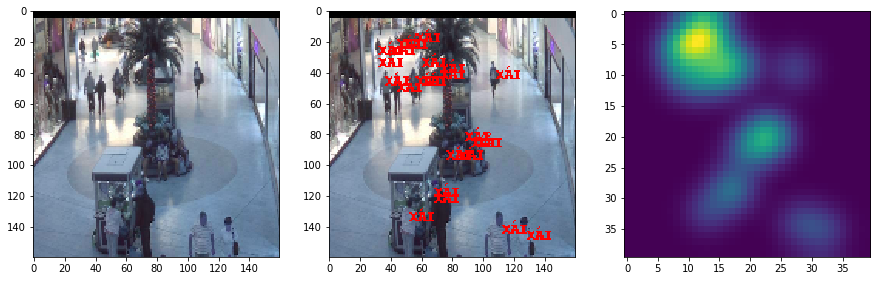

In [4]:
mall = ImageLoader(new_shape=new_shape, image_dir='data/mall')
mall.load_train_data()
mall.plot_image(filename='seq_000499.jpg')
print('Total image samples', len(mall.count))

### Create a model

In [0]:
input_shape = (new_shape, new_shape, 3)

In [6]:
model = MultiScaleCNN(input_shape=input_shape, name='mall')

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 160, 160, 64) 15616       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 160, 160, 64) 331840      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 160, 160, 64) 200768      conv2d[0][0]                     
_____________________________________

###  Split data to train/test

In [0]:
train_size = 0.8

In [8]:
x_train, x_test, y_train, y_test = train_test_split(mall.org_img, mall.gaussian_img, train_size=train_size)
print('x_train', x_train.shape, 'x_test', x_test.shape)
print('y_train', y_train.shape, 'y_test', y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_train (1600, 160, 160, 3) x_test (400, 160, 160, 3)
y_train (1600, 40, 40, 1) y_test (400, 40, 40, 1)


### Assign optimizer and compile a model

Instructions for updating:
Use tf.cast instead.
Train on 1440 samples, validate on 160 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
1440/1440 [==============================] - 226s 157ms/sample - loss: 1.6355 - val_loss: 0.9918
Epoch 2/30
1440/1440 [==============================] - 164s 114ms/sample - loss: 0.8832 - val_loss: 0.8002
Epoch 3/30
1440/1440 [==============================] - 163s 113ms/sample - loss: 0.7489 - val_loss: 0.7027
Epoch 4/30
1440/1440 [==============================] - 163s 113ms/sample - loss: 0.6682 - val_loss: 0.6356
Epoch 5/30
1440/1440 [==============================] - 163s 113ms/sample - loss: 0.6094 - val_loss: 0.5841
Epoch 6/30
1440/1440 [==============================] - 164s 114ms/sample - loss: 0.5631 - val_loss: 0.5424
Epoch 7/30
1440/1440 [==============================] - 166s 115ms/sample - loss: 0.5248 - val_loss: 0.5074
Epoch 8/30
1440/1440 [==============================] - 162s 113ms/sample - loss: 0.4923 - val_loss: 

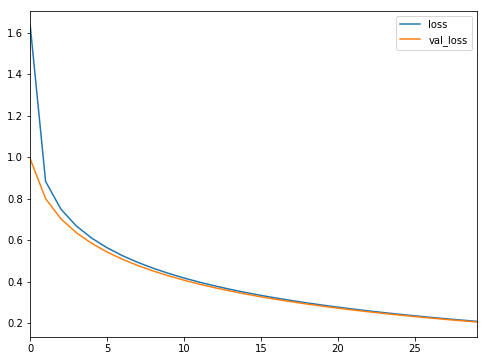

In [9]:
model.train(x_train, y_train, epochs=30, batch_size=32)

In [1]:
model.evaluate(x_test, y_test)

NameError: ignored

# 2. Further train the same model with ShackCam data

### Load shackcam data

Total image samples 3878


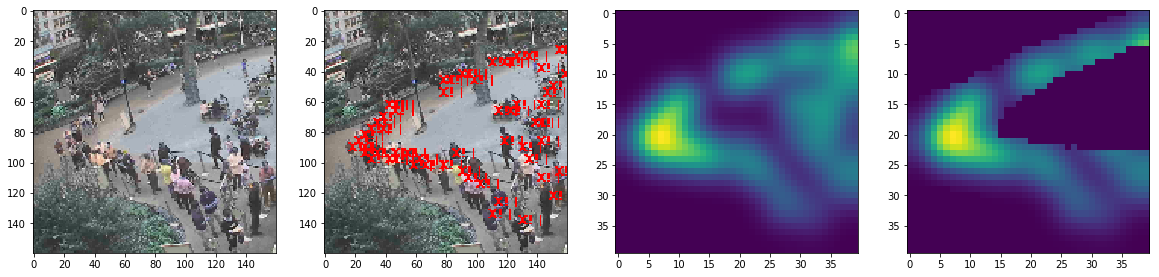

In [7]:
shackcam = ShackCamLoader(new_shape=new_shape, image_dir='data/shackcam')
shackcam.load_train_data()
shackcam.plot_image(i=500)
print('Total image samples', len(shackcam.count))

### Split data to train/test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(shackcam.org_img, shackcam.gaussian_img, 
                                                    train_size=train_size)
print('x_train', x_train.shape, 'x_test', x_test.shape)
print('y_train', y_train.shape, 'y_test', y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_train (3102, 160, 160, 3) x_test (776, 160, 160, 3)
y_train (3102, 40, 40, 1) y_test (776, 40, 40, 1)


### Load pre-trained weights

In [12]:
model = MultiScaleCNN(input_shape=input_shape, name='shackcam', 
                      existing_model_path='results/mall_final.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 160, 160, 64) 15616       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 160, 160, 64) 331840      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 1

### Assign optimizer and compile a model

Train on 2791 samples, validate on 311 samples
Epoch 1/5
2791/2791 [==============================] - 389s 139ms/sample - loss: 0.0369 - val_loss: 0.0041
Epoch 2/5
2791/2791 [==============================] - 301s 108ms/sample - loss: 0.0024 - val_loss: 0.0019
Epoch 3/5
2791/2791 [==============================] - 300s 108ms/sample - loss: 0.0017 - val_loss: 0.0018
Epoch 4/5
2791/2791 [==============================] - 298s 107ms/sample - loss: 0.0017 - val_loss: 0.0018
Epoch 5/5
2791/2791 [==============================] - 298s 107ms/sample - loss: 0.0017 - val_loss: 0.0018


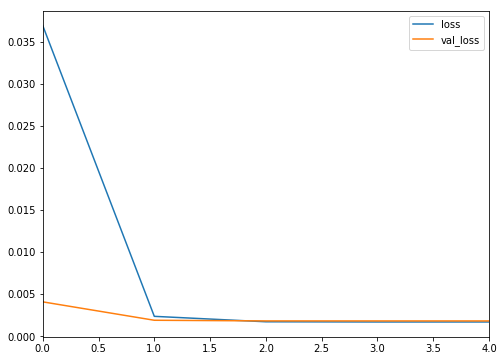

In [18]:
model.train(x_train, y_train, lr=0.0005, epochs=5, batch_size=32)

In [28]:
model.model.predict(x_test[0:1]).sum()
# x_test[0:1].shape

0.0

### Save results and inspect loss

In [22]:
model.evaluate(x_test, y_test)

776/776 [==============================] - 15s 19ms/sample - loss: 0.0018
Train score: 0.0017197401385783712
Test score: 0.001777707709517983


# Adding FC layers and training only the FC layers

### Read line counts, align order as shackcam annotations, remove files without counts

In [0]:
counts = pd.read_csv('data/shackcam/line_counts.csv', names=['file', 'line_count'], header=None)
counts = counts[counts.file.isin(shackcam.files)].reset_index(drop=True)
masked_gaussian_img = np.array([shackcam.mask_img(shackcam.data[f]['gaussian_img']) for f in counts.file])

In [30]:
x_train, x_test, y_train, y_test = train_test_split(masked_gaussian_img, counts.line_count.values, 
                                                    train_size=train_size)
print('x_train', x_train.shape, 'x_test', x_test.shape)
print('y_train', y_train.shape, 'y_test', y_test.shape)

x_train (3100, 40, 40, 1) x_test (776, 40, 40, 1)
y_train (3100,) y_test (776,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
input_shape = (new_shape//4, new_shape//4, 1)
model = FullyConnected(input_shape=input_shape, name='shackcam_fc')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d (MaxPooling2D) (None, 20, 20, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               205312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 205,825
Train

Train on 2790 samples, validate on 310 samples
Epoch 1/200
2790/2790 [==============================] - 2s 837us/sample - loss: 473.8297 - val_loss: 482.9640
Epoch 2/200
2790/2790 [==============================] - 0s 32us/sample - loss: 438.4497 - val_loss: 442.5630
Epoch 3/200
2790/2790 [==============================] - 0s 31us/sample - loss: 398.0472 - val_loss: 396.2392
Epoch 4/200
2790/2790 [==============================] - 0s 30us/sample - loss: 352.7957 - val_loss: 345.4372
Epoch 5/200
2790/2790 [==============================] - 0s 30us/sample - loss: 303.2041 - val_loss: 292.2854
Epoch 6/200
2790/2790 [==============================] - 0s 36us/sample - loss: 251.6559 - val_loss: 239.2534
Epoch 7/200
2790/2790 [==============================] - 0s 35us/sample - loss: 203.1224 - val_loss: 188.9449
Epoch 8/200
2790/2790 [==============================] - 0s 34us/sample - loss: 158.3072 - val_loss: 144.7041
Epoch 9/200
2790/2790 [==============================] - 0s 32us/sample 

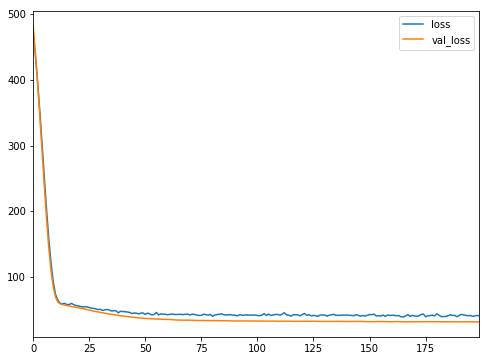

In [32]:
model.train(x_train, y_train, lr=0.001, epochs=200, batch_size=512)

In [33]:
model.evaluate(x_test, y_test)

776/776 [==============================] - 0s 228us/sample - loss: 29.8088
Train score: 41.08474090740245
Test score: 29.80878277414853


### Predict

In [0]:
def predict(i):
  shackcam.plot_image(i=i)
  pred = model.model.predict(shackcam.gaussian_img[i].reshape((1, *input_shape)))[0][0]
  truth = counts.iloc[i, 1]
  print('Pred', int(round(pred)))
  print('Truth', truth)

Pred 13
Truth 11


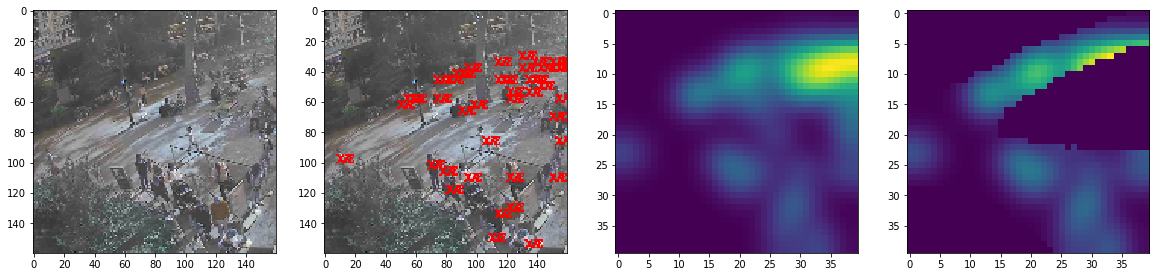

In [40]:
predict(1630)

Pred 0
Truth 0


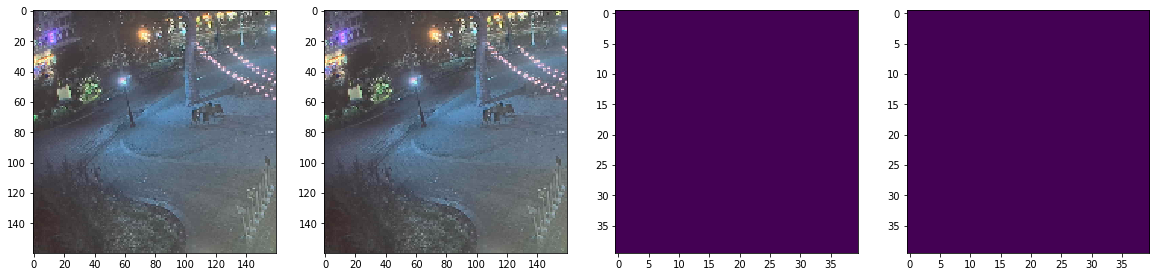

In [36]:
predict(100)

Pred 14
Truth 2


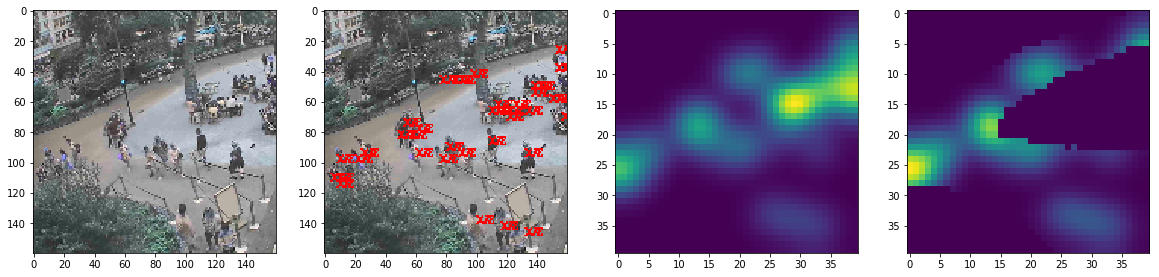

In [37]:
predict(1084)

# Predict density

In [0]:
from tensorflow.python.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
mscnn = load_model('results/mall.h5')
fc = load_model('results/shackcam_fc.h5')

In [47]:
mscnn.predict(np.expand_dims(shackcam.org_img[1], axis=0)).sum()

0.0